In [52]:
import platform
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from scipy.stats import linregress

In [2]:
platform.system()

'Windows'

In [4]:
x="""Set Angle: 0 | Analog Read: 59
Set Angle: 30 | Analog Read: 138
Set Angle: 60 | Analog Read: 217
Set Angle: 90 | Analog Read: 298
Set Angle: 120 | Analog Read: 374
Set Angle: 150 | Analog Read: 454
Set Angle: 180 | Analog Read: 532
Set Angle: 0 | Analog Read: 62
Set Angle: 30 | Analog Read: 139
Set Angle: 60 | Analog Read: 217
Set Angle: 90 | Analog Read: 298
Set Angle: 120 | Analog Read: 377
Set Angle: 150 | Analog Read: 453
Set Angle: 180 | Analog Read: 532
Set Angle: 0 | Analog Read: 59
Set Angle: 30 | Analog Read: 139
Set Angle: 60 | Analog Read: 218
Set Angle: 90 | Analog Read: 296
Set Angle: 120 | Analog Read: 375
Set Angle: 150 | Analog Read: 454
Set Angle: 180 | Analog Read: 534"""

In [5]:
l = [int(i.split(":")[2][1:]) for i in x.split("\n")]
l

[59,
 138,
 217,
 298,
 374,
 454,
 532,
 62,
 139,
 217,
 298,
 377,
 453,
 532,
 59,
 139,
 218,
 296,
 375,
 454,
 534]

In [6]:
l2 = [l[i*7:i*7+7] for i in range(0, 3)]
l2

[[59, 138, 217, 298, 374, 454, 532],
 [62, 139, 217, 298, 377, 453, 532],
 [59, 139, 218, 296, 375, 454, 534]]

In [7]:
import numpy as np

In [8]:
a = np.array(l2)
a

array([[ 59, 138, 217, 298, 374, 454, 532],
       [ 62, 139, 217, 298, 377, 453, 532],
       [ 59, 139, 218, 296, 375, 454, 534]])

In [9]:
[round(i,2) for i in a.mean(axis=0)]

[60.0, 138.67, 217.33, 297.33, 375.33, 453.67, 532.67]

In [10]:
a.mean(axis=0)

array([ 60.        , 138.66666667, 217.33333333, 297.33333333,
       375.33333333, 453.66666667, 532.66666667])

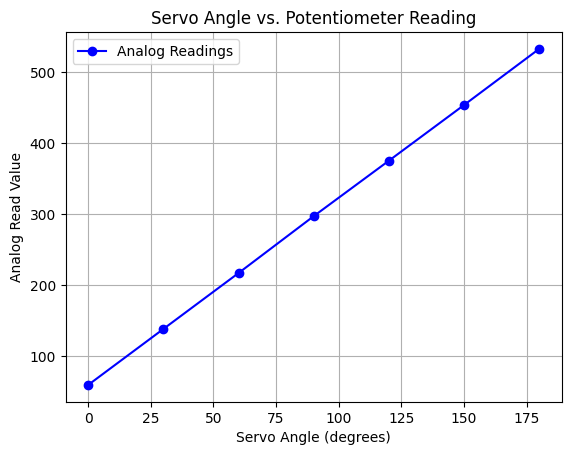

In [8]:
import matplotlib.pyplot as plt

# Given x and y values
x_values = list(range(0, 181, 30))
y_values = [60.0, 138.67, 217.33, 297.33, 375.33, 453.67, 532.67]

# Plot the data
plt.plot(x_values, y_values, marker='o', linestyle='-', color='b', label='Analog Readings')

# Labels and title
plt.xlabel("Servo Angle (degrees)")
plt.ylabel("Analog Read Value")
plt.title("Servo Angle vs. Potentiometer Reading")
plt.grid(True)
plt.legend()

# Show the plot
plt.show()


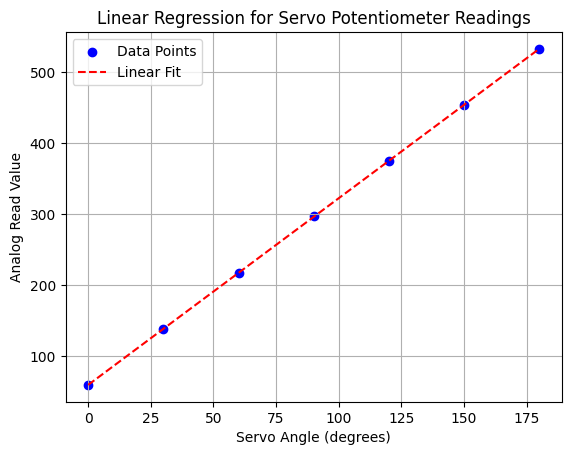

'y = 2.6262x + 60.0704'

In [9]:
from sklearn.linear_model import LinearRegression

# Reshape x_values for sklearn
x_reshaped = np.array(x_values).reshape(-1, 1)
y_reshaped = np.array(y_values)

# Perform linear regression
lin_reg = LinearRegression()
lin_reg.fit(x_reshaped, y_reshaped)
o = lin_reg.score(x_reshaped, y_reshaped)

# Get linear equation coefficients
slope = lin_reg.coef_[0]
intercept = lin_reg.intercept_

# Generate the linear equation
linear_eq = f"y = {slope:.4f}x + {intercept:.4f}"

# Generate predictions for plotting
y_pred = lin_reg.predict(x_reshaped)

# Plot the data and linear fit
plt.scatter(x_values, y_values, color='b', label='Data Points')
plt.plot(x_values, y_pred, 'r--', label='Linear Fit')
plt.xlabel("Servo Angle (degrees)")
plt.ylabel("Analog Read Value")
plt.title("Linear Regression for Servo Potentiometer Readings")
plt.legend()
plt.grid(True)
plt.show()

# Display the equation
linear_eq


In [ ]:
o # R^2 value

0.9999937501214105

In [55]:
string = """63,66,79,71,72,78,80,82,86,88,91,92,95,98,101,104,106,110,113,113,117,121,122,125,130,131,135,137,143,143,165,155,150,153,157,160,161,171,167,169,173,183,180,181,184,186,189,192,194,197,198,203,206,209,211,214,218,220,222,227,231,230,234,236,238,241,244,248,249,252,254,258,271,263,265,269,272,275,284,279,282,284,287,288,292,294,298,309,302,305,308,312,313,316,320,322,325,327,339,332,336,340,346,343,347,349,351,355,357,361,363,365,368,371,375,377,378,437,391,387,391,392,396,399,403,410,407,465,411,416,418,420,423,428,428,432,441,437,439,442,445,448,450,458,455,459,460,464,467,469,472,474,478,480,483,485,490,491,495,497,500,504,507,507,509,515,516,519,520,524,528,530,533,536,541,540,543,546,548,552,554,
62,61,66,70,72,76,86,81,86,86,89,93,93,98,100,103,104,108,110,114,116,125,123,124,128,129,133,112,137,140,144,146,148,152,154,157,160,162,165,168,170,173,177,183,181,184,186,187,193,196,198,200,204,205,208,211,214,221,219,221,225,228,231,237,237,237,241,244,247,250,254,256,257,261,264,294,267,270,274,276,279,282,290,287,291,292,297,326,301,302,306,309,312,314,318,320,322,324,328,330,332,337,338,340,344,346,348,351,354,356,360,363,365,368,371,373,376,380,381,383,387,390,394,397,399,401,403,407,408,412,414,417,420,423,460,428,430,433,436,438,441,445,449,450,452,456,458,460,463,468,468,471,474,478,480,482,486,487,492,493,496,499,501,503,506,510,512,514,517,521,523,525,578,532,535,536,540,541,546,554,551,
61,63,70,70,72,76,85,81,85,89,90,92,95,103,99,101,104,108,110,113,117,120,123,125,130,130,133,138,139,141,144,175,149,151,154,158,159,162,165,168,170,179,176,179,181,185,188,187,192,195,198,200,203,205,208,212,215,218,219,222,225,227,232,236,237,238,242,245,247,250,253,256,258,262,267,266,269,272,278,277,280,284,292,289,292,294,297,302,303,306,308,310,316,316,319,322,323,328,329,337,334,338,383,343,346,353,350,354,356,360,363,364,368,370,374,376,379,397,388,386,390,392,396,398,401,403,406,409,411,415,420,420,423,434,428,430,435,437,439,441,444,448,450,462,456,457,460,463,465,470,471,474,477,479,482,484,488,491,494,496,498,501,504,507,509,513,515,518,519,524,530,533,532,534,536,539,542,545,548,550,552,
63,66,68,69,72,77,77,80,84,86,89,91,95,97,102,102,111,108,110,113,118,119,121,125,131,129,132,135,136,141,144,151,148,151,154,136,160,161,163,168,170,171,176,178,182,184,190,188,191,194,196,200,203,206,208,212,211,216,218,222,225,228,231,232,234,238,241,243,245,249,254,253,256,262,262,266,267,270,274,275,278,281,284,287,290,293,295,297,299,302,306,309,317,315,316,319,325,324,326,331,331,336,337,341,343,346,347,351,358,356,364,361,364,368,370,373,377,378,381,384,387,389,392,394,397,399,404,409,408,413,413,415,419,421,424,427,433,432,438,438,440,444,445,449,451,454,456,459,462,466,467,471,474,475,479,481,484,487,488,492,495,497,501,502,506,508,511,514,517,519,517,520,524,525,528,536,533,536,538,545,544,
62,65,67,64,73,76,77,81,85,87,91,90,95,97,101,102,105,109,110,114,117,118,126,123,127,128,132,136,137,140,143,145,154,150,153,156,159,161,165,166,170,173,179,178,181,186,186,197,190,195,195,200,202,205,208,211,215,215,217,221,224,227,230,234,234,237,244,243,248,248,257,254,256,259,263,267,268,270,276,274,278,281,286,285,288,290,294,302,299,302,305,310,310,313,316,319,321,324,326,332,331,336,339,339,343,347,347,350,353,356,359,361,364,367,370,379,377,379,382,383,386,389,393,394,397,400,402,404,408,412,413,417,419,431,425,426,429,430,435,437,440,443,445,449,452,454,459,458,518,464,467,469,473,476,478,480,483,488,489,492,494,497,499,501,505,508,511,513,515,519,526,524,528,529,532,535,542,542,543,611,550,
60,64,75,69,73,76,82,80,82,83,89,92,94,97,99,99,105,107,110,116,116,125,121,125,126,129,134,136,137,141,142,146,148,151,154,155,159,161,165,168,171,173,176,180,181,184,187,189,192,194,197,200,201,204,209,211,213,216,220,221,226,228,230,233,236,255,241,244,246,249,251,254,257,260,265,265,267,270,274,276,279,281,285,287,290,292,295,320,300,302,305,309,309,313,317,319,322,324,326,332,332,335,340,341,343,346,349,351,353,355,359,362,364,367,370,372,376,378,384,383,386,388,391,396,397,399,401,404,408,410,413,416,418,428,424,426,428,430,435,438,439,444,446,448,451,454,457,459,461,464,468,469,472,475,479,480,483,486,489,492,494,497,500,501,504,508,510,512,514,518,520,525,527,538,532,537,537,539,542,547,548,
61,60,66,69,73,76,77,80,81,84,87,91,97,95,98,100,101,106,108,111,115,127,119,123,128,128,131,134,137,138,143,144,146,144,152,155,158,162,164,166,170,171,174,181,178,182,184,192,190,192,195,197,200,203,206,208,212,219,217,219,222,225,228,235,232,234,238,240,243,246,248,252,259,257,259,261,264,268,271,272,276,278,282,283,286,288,291,293,297,299,302,305,310,309,315,314,317,322,323,325,328,333,333,336,339,341,345,347,357,353,355,357,361,362,366,370,376,374,376,379,382,384,388,390,392,395,399,401,404,408,410,412,415,416,421,422,424,428,430,432,435,438,441,444,446,454,452,454,458,459,463,466,468,470,473,475,479,480,485,487,490,492,495,499,500,503,505,513,511,513,516,519,522,530,527,531,532,533,538,546,543,
61,63,66,68,72,74,78,80,83,91,88,90,92,96,97,101,103,106,109,112,114,115,119,123,125,131,132,139,135,138,141,145,148,149,155,156,157,159,162,164,168,170,174,177,179,181,192,187,190,192,195,199,200,202,205,209,210,214,216,218,223,224,227,229,231,234,238,240,244,246,252,251,259,257,256,262,264,267,271,276,276,278,281,283,286,288,294,298,296,298,302,304,309,309,313,315,317,320,332,325,328,331,333,336,339,342,344,346,352,352,356,356,360,363,367,371,372,368,376,379,382,385,390,391,393,396,397,401,403,407,413,410,414,416,419,421,425,428,430,433,437,438,443,444,445,448,451,454,457,460,463,464,467,470,474,478,482,479,483,488,489,491,495,496,499,502,505,507,509,513,516,519,521,559,525,528,532,534,536,543,542,
61,67,64,67,72,75,85,79,84,83,88,90,94,96,99,101,103,106,108,112,114,115,119,122,128,128,132,131,135,138,141,150,146,148,152,154,157,160,162,165,168,175,174,177,179,181,195,185,189,191,194,197,206,203,205,208,219,213,215,219,229,223,228,229,232,235,238,240,243,246,248,250,254,256,259,262,264,267,270,272,275,278,283,282,285,289,292,296,296,299,301,306,306,310,314,318,317,320,323,324,328,331,333,335,339,340,345,346,350,352,354,357,361,362,366,367,372,373,387,378,382,385,390,390,393,394,400,401,403,407,409,414,414,423,420,422,426,425,430,435,435,440,440,443,445,448,450,455,456,463,474,464,467,470,473,475,479,480,486,486,489,491,493,497,501,502,505,507,509,513,515,518,522,523,526,529,532,535,536,540,545,
66,71,68,70,74,76,78,81,84,91,97,92,94,98,107,104,105,108,111,113,123,120,123,125,133,129,133,136,140,140,143,147,160,151,153,157,160,162,164,167,184,178,177,178,183,184,187,195,195,195,198,201,203,205,209,213,215,224,220,222,230,245,231,239,237,239,242,245,248,250,252,256,257,262,262,266,268,271,274,276,280,282,285,288,290,293,297,298,300,305,306,310,312,315,317,320,322,348,328,331,334,336,338,341,344,347,349,352,355,358,360,363,367,369,370,373,377,380,383,385,388,391,394,396,399,401,404,407,409,414,417,417,421,423,425,428,431,434,437,439,442,446,447,450,454,455,459,460,465,465,505,473,475,516,480,484,486,488,495,493,497,500,500,506,506,510,514,515,520,521,524,527,529,532,534,538,542,542,545,550,551,
62,66,68,70,73,77,77,81,84,87,87,92,94,98,106,103,105,109,110,114,115,118,131,124,127,130,135,141,138,139,144,145,149,151,154,155,159,161,164,168,171,173,177,178,182,184,187,203,192,195,197,200,204,205,209,212,215,217,219,239,225,228,231,239,235,239,242,244,247,249,251,255,258,262,264,273,268,273,276,280,279,284,276,292,290,292,297,298,301,304,307,310,316,315,318,320,323,325,328,330,334,336,340,342,347,353,350,352,355,360,369,363,367,369,372,376,379,409,383,385,389,392,395,397,398,402,405,407,410,415,416,417,421,428,426,429,431,435,440,439,444,448,449,451,455,457,459,462,465,467,469,472,476,478,481,486,488,488,493,495,497,500,502,505,509,511,514,517,519,522,524,527,530,535,577,538,541,545,546,549,553,
64,64,68,70,73,74,75,80,86,88,97,91,95,97,107,102,105,107,111,113,114,118,120,124,128,129,133,143,136,140,144,147,147,183,154,157,161,163,165,168,172,189,176,179,182,192,187,189,193,195,198,199,204,207,210,213,214,218,220,223,225,230,233,236,236,240,243,246,249,250,254,256,258,261,264,266,269,273,281,278,280,286,286,289,292,299,296,300,304,311,309,311,313,316,324,321,328,326,329,334,334,338,340,343,347,348,351,354,365,359,363,364,367,371,374,382,381,381,387,386,389,392,395,398,401,404,405,408,411,416,419,418,422,426,427,430,432,435,438,441,444,449,450,452,453,458,461,463,465,468,472,473,488,482,482,484,488,490,492,496,498,501,506,507,509,514,517,518,525,524,526,531,533,534,540,541,543,547,555,552,554,
65,65,68,71,72,75,77,81,84,93,89,92,95,98,100,102,111,108,110,113,116,119,131,124,126,130,134,136,135,140,143,146,154,152,154,157,160,164,165,166,170,178,176,177,181,184,201,189,192,195,198,201,203,205,208,212,219,217,219,222,223,227,230,239,235,238,242,244,247,249,257,254,257,261,263,265,268,272,275,276,279,282,292,287,290,292,295,309,301,303,306,313,311,314,317,319,322,325,329,331,339,339,341,345,347,355,351,355,357,360,362,365,368,370,374,382,379,382,389,387,389,394,398,400,402,404,407,410,413,417,420,421,426,429,428,431,435,436,440,446,445,450,453,454,456,459,462,465,467,471,474,474,479,538,488,489,493,495,498,502,503,506,509,510,514,517,522,522,526,531,533,535,545,542,544,546,549,551,554,557,560,
63,64,67,70,73,79,80,81,83,88,95,91,94,98,101,104,106,109,110,114,117,120,122,125,129,131,134,138,139,142,145,148,150,154,170,158,162,164,167,170,173,175,178,179,184,193,190,205,195,200,201,204,212,210,214,216,231,221,223,225,236,230,234,283,239,244,246,249,252,254,256,259,262,264,267,270,272,276,280,279,283,287,294,291,295,297,301,303,305,308,310,323,314,318,324,325,328,329,337,335,339,342,344,346,350,350,354,357,360,362,366,368,371,377,378,387,383,386,386,391,393,395,399,401,405,406,411,418,414,418,423,423,426,436,431,434,436,440,442,445,448,451,459,456,461,462,465,467,470,473,532,479,482,484,487,490,501,550,497,500,503,506,511,512,514,517,519,522,524,529,531,533,538,539,542,544,548,550,553,555,558,
62,64,68,69,72,76,79,80,84,85,89,92,94,98,107,103,107,108,111,114,123,120,121,125,126,130,133,138,138,140,145,146,147,151,154,156,159,161,166,170,171,172,176,177,182,183,186,190,192,195,198,200,202,205,209,211,214,216,219,220,224,227,230,239,234,239,241,244,246,249,252,256,257,259,262,265,268,272,273,275,279,284,284,287,289,291,294,297,300,302,306,313,311,314,319,318,322,325,327,329,332,335,338,340,344,346,349,352,354,356,360,362,365,368,372,375,375,379,386,385,387,390,393,395,397,400,402,406,408,412,414,417,419,452,424,427,429,433,436,438,441,445,445,449,458,454,457,459,462,464,468,470,474,475,478,481,489,490,493,496,499,501,504,507,509,512,515,563,520,524,526,528,531,533,536,539,553,544,546,550,553,
62,71,68,70,81,75,86,80,84,88,90,92,96,98,100,102,105,110,112,115,116,120,122,127,128,130,134,136,139,143,144,148,162,153,156,158,162,164,167,169,172,187,178,184,183,185,189,189,193,198,199,201,214,208,210,212,223,217,223,224,235,229,233,234,263,240,243,246,249,250,254,257,259,262,265,269,270,273,276,280,281,284,286,290,292,294,298,300,303,305,309,312,313,316,323,322,326,327,329,333,335,339,341,345,348,349,353,354,362,361,363,365,368,371,374,378,381,384,390,390,391,395,402,400,403,405,408,419,412,416,425,421,425,428,432,432,436,438,440,442,446,449,455,453,456,459,462,464,467,469,473,474,479,485,483,487,490,493,495,499,501,504,506,508,512,515,518,519,522,527,529,531,534,536,539,542,546,549,549,554,557,
62,68,67,70,72,75,78,81,83,88,89,92,95,98,102,102,105,107,110,113,120,118,121,124,126,130,134,135,138,141,144,147,148,152,153,156,160,164,165,168,170,172,176,183,182,189,186,190,191,195,197,201,204,207,213,211,214,215,220,222,224,228,230,239,235,238,242,244,246,249,254,256,257,259,264,266,268,271,274,275,279,284,284,288,288,293,296,297,301,303,306,309,316,314,320,319,322,325,337,330,333,336,344,341,344,347,350,352,356,359,360,362,365,367,371,381,377,379,381,384,387,390,393,395,398,401,404,406,408,412,415,417,420,422,425,427,430,433,437,438,442,445,446,451,452,455,459,461,463,466,469,471,473,477,480,484,486,487,490,493,496,498,501,503,507,510,512,515,517,522,523,526,529,531,534,537,540,582,587,547,551,
"""

In [56]:
a = np.array([[int(j) for j in (i.split(",")[:-1])] for i in string.split("\n")[:-1]])
a

array([[ 63,  66,  79, ..., 548, 552, 554],
       [ 62,  61,  66, ..., 546, 554, 551],
       [ 61,  63,  70, ..., 548, 550, 552],
       ...,
       [ 62,  64,  68, ..., 546, 550, 553],
       [ 62,  71,  68, ..., 549, 554, 557],
       [ 62,  68,  67, ..., 587, 547, 551]])

In [57]:
a.shape

(17, 181)

In [58]:
df = pd.DataFrame(a, columns=[f"{i}_deg" for i in range(1, a.shape[1]+1)])

In [59]:
summary = df.describe()
summary

,1_deg,2_deg,3_deg,4_deg,5_deg,6_deg,7_deg,8_deg,9_deg,10_deg,...,172_deg,173_deg,174_deg,175_deg,176_deg,177_deg,178_deg,179_deg,180_deg,181_deg
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,...,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,62.352941,65.176471,68.411765,69.235294,73.000000,75.941176,79.823529,80.529412,84.000000,87.352941,...,526.529412,532.705882,534.588235,536.941176,537.411765,540.882353,544.764706,547.647059,553.058824,550.941176
std,1.538716,2.963007,3.554202,1.678147,2.150581,1.297622,3.609628,0.717430,1.369306,2.760009,...,5.304687,13.151828,7.882408,11.787019,4.835530,6.213718,11.087884,11.725726,15.582324,5.201810
min,60.000000,60.000000,64.000000,64.000000,72.000000,74.000000,75.000000,79.000000,81.000000,83.000000,...,518.000000,521.000000,523.000000,525.000000,528.000000,532.000000,533.000000,536.000000,540.000000,542.000000
25%,61.000000,64.000000,67.000000,69.000000,72.000000,75.000000,77.000000,80.000000,83.000000,86.000000,...,524.000000,527.000000,531.000000,532.000000,536.000000,537.000000,539.000000,542.000000,547.000000,548.000000
50%,62.000000,65.000000,68.000000,70.000000,72.000000,76.000000,78.000000,81.000000,84.000000,88.000000,...,527.000000,530.000000,534.000000,535.000000,538.000000,542.000000,544.000000,546.000000,550.000000,551.000000
75%,63.000000,66.000000,68.000000,70.000000,73.000000,76.000000,82.000000,81.000000,85.000000,88.000000,...,531.000000,533.000000,536.000000,540.000000,540.000000,543.000000,547.000000,549.000000,554.000000,554.000000
max,66.000000,71.000000,79.000000,71.000000,81.000000,79.000000,86.000000,82.000000,86.000000,93.000000,...,535.000000,578.000000,559.000000,577.000000,546.000000,553.000000,582.000000,587.000000,611.000000,560.000000


<Axes: >

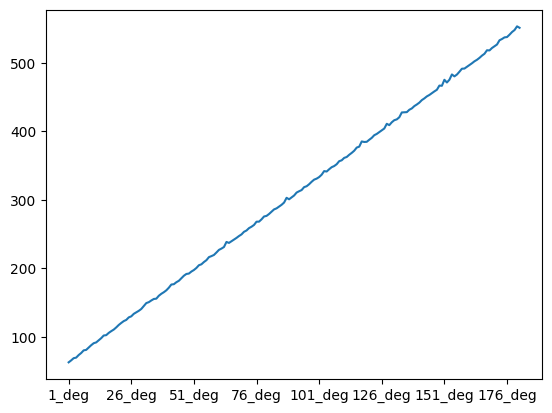

In [60]:
summary.loc["mean"].plot()  

<Axes: >

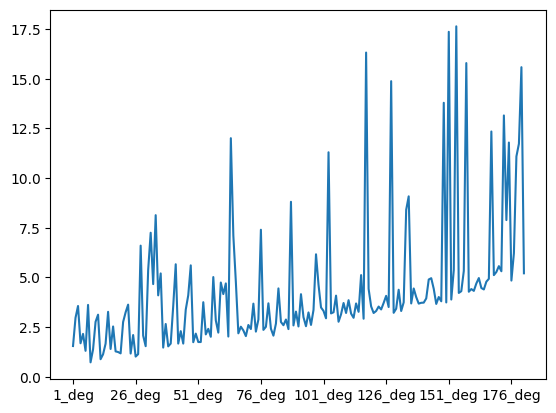

In [61]:
summary.loc["std"].plot()  

In [62]:
a.max()

611

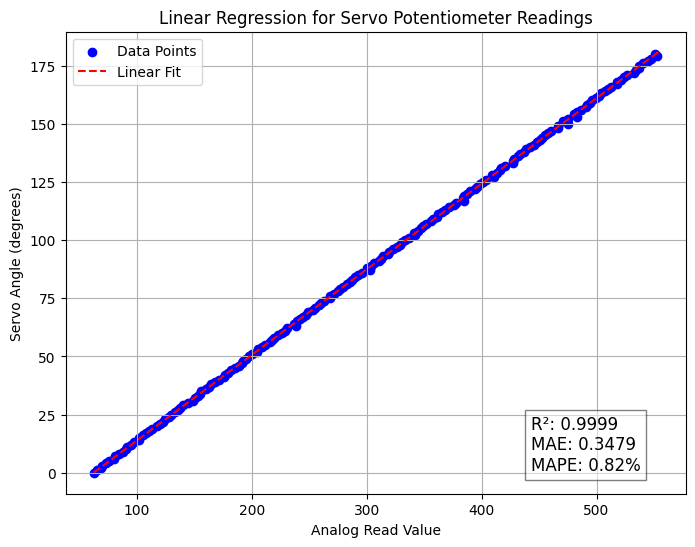

'y = 0.3678x + -22.8739'

In [65]:
# Reshape x_values for sklearn
x_values = a.mean(axis=0)
y_values = np.array([i for i in range(181)])
y_reshaped = y_values.reshape(-1, 1)
x_reshaped = x_values.reshape(-1, 1)

# Perform linear regression
lin_reg = LinearRegression()
lin_reg.fit(x_reshaped, y_reshaped)

# Get R² score
r2_score = lin_reg.score(x_reshaped, y_reshaped)

# Get predictions
y_pred = lin_reg.predict(x_reshaped)

# Compute MAE
mae = mean_absolute_error(y_values, y_pred.flatten())

# Compute MAPE (avoid division by zero)
mape = np.mean(np.abs((y_values - y_pred.flatten()) / np.where(y_values == 0, 1, y_values))) * 100

# Get linear equation coefficients
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

# Generate the linear equation
linear_eq = f"y = {round(slope,4)}x + {round(intercept,4)}"

# Plot the data and linear fit
plt.figure(figsize=(8, 6))
plt.scatter(x_values, y_values, color='b', label='Data Points')
plt.plot(x_values, y_pred, 'r--', label='Linear Fit')

# Add R², MAE, and MAPE to the plot
metrics_text = f"R²: {r2_score:.4f}\nMAE: {mae:.4f}\nMAPE: {mape:.2f}%"
plt.text(0.75, 0.05, metrics_text, transform=plt.gca().transAxes, fontsize=12, 
         bbox=dict(facecolor='white', alpha=0.5))

# Labels and title
plt.ylabel("Servo Angle (degrees)")
plt.xlabel("Analog Read Value")
plt.title("Linear Regression for Servo Potentiometer Readings")
plt.legend()
plt.grid(True)

# Show plot
plt.show()

# Display equation
linear_eq



In [64]:
from scipy.stats import linregress

# Perform linear regression with scipy to get the p-value
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

print(f"R²: {r_value**2}")
print(f"p-value: {p_value}")

R²: 0.9999178175248472
p-value: 0.0


In [86]:
test = """-0.07,0.67,1.77,2.50,4.34,4.34,4.71,6.55,8.02,8.39,9.86,10.23,12.07,12.80,13.54,14.27,16.11,16.48,17.58,18.69,19.42,21.26,21.26,23.10,23.10,24.57,26.41,26.78,27.15,28.99,29.72,30.82,31.19,32.66,33.77,35.97,37.08,37.45,38.92,39.28,40.39,44.43,42.23,43.33,44.43,45.54,46.64,48.11,48.48,49.21,49.95,51.42,51.79,53.26,54.36,55.47,57.67,57.31,58.04,59.88,62.09,61.35,63.19,63.56,64.29,65.40,66.87,63.93,68.71,69.44,71.28,71.65,72.39,73.86,74.59,75.70,76.80,77.54,78.64,79.74,80.48,81.95,84.89,83.42,94.09,85.99,85.99,87.47,88.20,88.94,90.04,91.14,91.88,93.35,95.56,95.19,105.49,97.40,98.13,98.87,100.34,105.49,109.17,106.59,107.33,107.70,108.43,112.48,112.84,113.58,113.95,115.05,116.52,117.26,117.99,119.10,120.57,122.04,124.25,123.88,124.98,126.09,127.92,130.87,129.76,130.87,131.23,132.34,133.81,135.28,158.82,137.49,138.22,138.96,140.80,141.16,142.27,143.37,144.48,166.91,146.68,148.15,148.52,152.20,150.73,152.93,153.30,153.67,154.41,155.88,156.61,158.45,158.45,159.55,160.29,161.39,162.50,165.07,164.34,165.81,166.54,167.65,170.96,184.20,170.22,171.69,172.43,173.90,175.00,176.11,177.21,177.94,179.78,183.46,181.26,182.36,183.09,184.20,185.30,187.14,187.51,
-0.07,0.67,2.14,2.87,4.71,4.71,5.45,7.29,8.02,8.39,10.60,10.96,12.07,13.17,13.91,15.38,16.11,17.22,18.32,18.69,20.16,21.26,22.37,23.47,23.84,29.72,26.04,27.51,27.51,28.62,29.35,30.46,31.56,32.30,33.77,34.50,35.24,36.34,37.45,38.55,39.65,40.02,41.12,44.43,43.70,44.43,44.43,46.27,47.01,48.85,48.85,50.32,56.57,52.53,53.63,54.73,55.10,57.67,56.94,58.04,63.19,59.51,61.72,65.03,63.19,64.29,65.40,66.13,66.87,67.97,69.08,70.18,71.28,72.39,73.12,74.23,74.96,76.43,76.80,78.27,79.01,80.11,80.48,81.58,83.05,84.16,85.26,85.99,87.10,87.83,88.94,91.14,100.34,91.88,92.98,94.09,94.82,95.56,98.50,97.76,98.13,99.60,100.34,112.11,102.55,103.28,104.38,105.86,106.59,108.06,108.43,109.53,109.90,111.37,112.84,115.42,114.32,115.79,118.36,116.89,118.36,119.83,120.57,121.67,122.04,123.51,124.61,126.82,126.09,128.29,129.40,129.03,131.23,131.97,132.34,133.44,134.18,135.65,136.38,137.12,138.22,139.33,140.06,141.16,141.90,143.00,155.14,145.21,145.95,147.42,148.15,149.26,150.36,151.10,152.57,154.41,154.04,155.14,156.61,157.72,158.82,158.82,159.92,161.03,161.76,163.23,163.97,177.21,165.81,166.91,168.01,169.12,170.22,171.32,172.06,172.80,173.90,175.00,175.74,177.21,177.94,
-0.44,2.50,1.77,2.87,3.98,5.45,6.55,6.55,7.65,8.76,11.70,10.96,12.43,13.54,14.27,15.38,15.01,17.22,18.32,19.42,20.16,21.63,22.37,23.47,24.20,25.68,26.78,27.15,29.35,29.35,30.46,31.93,34.87,33.40,34.50,35.61,36.34,37.45,38.18,39.28,40.76,41.86,42.23,43.33,44.80,45.54,46.64,47.38,48.11,49.58,50.32,51.42,52.16,53.63,54.36,63.93,57.31,57.31,58.78,59.51,60.62,61.35,62.46,63.56,64.29,65.03,66.50,69.44,68.71,69.81,70.18,71.28,72.39,73.86,74.59,75.70,76.06,78.27,78.64,79.74,80.48,81.58,82.68,83.42,84.52,85.26,86.36,87.47,88.20,89.67,88.94,91.51,93.35,94.45,95.56,95.93,98.13,98.50,99.24,100.34,101.81,102.55,103.28,121.67,105.86,107.33,107.33,108.80,109.53,110.64,114.68,112.48,113.58,114.68,115.79,116.52,117.26,137.12,119.46,120.57,122.04,122.77,123.88,124.61,125.72,126.82,127.56,128.66,129.40,130.87,133.44,132.34,133.81,134.91,135.28,136.75,137.12,138.59,139.33,140.43,141.53,142.64,143.37,144.48,145.21,146.68,147.79,148.89,149.26,150.73,151.83,152.93,154.04,154.77,155.88,156.24,157.35,158.45,159.55,160.66,161.76,162.13,163.97,164.34,165.44,166.91,168.01,169.12,169.85,170.96,171.69,173.16,174.27,176.47,175.74,176.47,177.94,178.68,179.78,201.85,181.99,
-0.07,0.67,2.50,2.87,3.61,4.71,6.55,6.55,8.39,13.17,9.49,10.96,11.70,12.80,14.27,14.64,16.48,17.22,17.95,19.06,20.16,24.20,22.37,23.10,24.20,25.68,26.41,27.51,27.88,34.50,30.82,31.19,32.30,33.77,34.50,35.24,36.71,37.08,38.18,38.92,40.02,42.96,42.23,42.96,43.70,45.17,45.54,50.32,48.11,48.48,49.95,62.82,52.16,53.63,54.36,55.47,57.67,56.94,57.67,58.78,59.51,60.98,62.09,62.82,63.93,64.66,66.13,67.97,67.60,69.08,69.44,70.92,71.65,87.10,73.86,74.96,75.70,76.80,78.64,78.27,80.11,80.85,81.21,83.05,83.79,84.89,85.99,87.10,87.47,89.31,89.67,90.78,91.88,92.98,94.09,94.45,95.93,96.66,97.76,98.50,99.60,100.71,101.81,102.91,103.65,104.75,106.22,106.96,107.33,108.80,109.90,110.64,111.37,112.84,114.32,115.79,115.42,116.52,117.99,118.36,119.83,120.57,121.67,122.77,123.51,124.25,125.72,126.45,127.56,128.66,129.40,130.50,131.60,132.34,133.81,134.91,135.65,136.75,137.49,138.59,139.69,141.16,142.27,142.64,143.37,144.48,145.95,146.68,147.79,148.52,149.62,150.36,152.20,153.67,153.67,154.41,155.51,156.98,157.35,158.45,159.55,160.66,162.13,162.13,163.60,165.07,165.81,166.54,167.28,168.75,169.12,170.59,171.69,173.53,173.53,174.63,175.74,176.84,177.58,178.68,179.78,
-0.07,1.03,1.40,2.14,3.61,4.34,4.71,6.55,8.02,9.49,9.12,10.23,11.70,12.80,13.54,14.64,15.01,16.48,17.22,18.69,19.79,19.79,21.26,22.37,23.10,24.20,26.04,26.41,27.15,27.88,29.35,30.46,33.40,31.93,33.03,34.14,34.87,37.81,37.08,37.81,39.65,39.28,41.12,42.23,42.96,44.07,45.17,45.90,46.64,47.74,58.41,49.95,51.05,52.53,52.89,54.00,56.20,56.20,56.57,57.67,58.78,59.88,61.35,63.19,62.46,63.56,65.03,66.50,67.24,67.60,68.71,70.18,72.75,71.65,72.75,73.86,74.59,75.70,76.80,77.90,78.64,79.37,80.85,81.58,82.68,83.79,84.52,85.63,86.73,87.83,88.57,92.98,90.04,91.51,92.62,93.35,94.45,95.19,97.76,97.40,98.13,99.24,107.70,101.44,102.55,102.91,104.38,105.12,108.43,107.70,108.06,109.53,110.27,111.01,112.84,112.84,113.95,115.42,116.89,117.26,118.36,119.10,120.20,120.94,122.77,123.14,123.88,124.98,125.72,127.19,128.29,129.03,130.13,130.50,131.60,132.71,144.11,134.91,136.02,136.75,137.85,138.96,139.69,141.53,142.27,142.64,144.11,144.84,145.58,147.05,147.79,148.15,149.62,150.36,151.46,152.57,153.67,154.41,156.24,156.61,157.72,170.22,159.19,160.66,161.39,162.87,163.23,164.34,165.44,166.54,167.65,168.75,169.49,170.22,171.32,172.80,173.90,174.27,175.74,176.47,177.94,
"""

In [87]:
yp = np.array([[float(j) for j in (i.split(",")[:-1])] for i in test.split("\n")[:-1]])
yp.shape

(5, 181)

In [88]:
yt = np.array([[i for i in range(181)]]*yp.shape[0])
yt.shape

(5, 181)

In [89]:
np.abs(yp - yt).mean()

1.696939226519337

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

def plot(data):
    # Example data (replace this with your actual data)
    x = np.array([data[3], data[4], data[5], 0, 90, 180])
    y = np.array([0, 90, 180, data[0], data[1], data[2]])

    # Reshape x for sklearn
    x_reshaped = x.reshape(-1, 1)

    # Linear Regression
    model = LinearRegression()
    model.fit(x_reshaped, y)
    print("Coeff: ",model.coef_)

    # Predictions
    y_pred = model.predict(x_reshaped)

    # Goodness-of-fit metrics
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)
    mae = np.mean(np.abs(y-y_pred))
    r2 = r2_score(y, y_pred)

    # Plotting
    plt.scatter(x, y, label='Data Points')
    plt.plot(x, y_pred, color='red', label='Linear Fit')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Linear Regression Fit')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Create dataframe to display metrics
    gof_metrics = pd.DataFrame({
        "Metric": ["MSE", "RMSE", "R-squared", "MAE"],
        "Value": [mse, rmse, r2, mae]
    })

    # Plotting using matplotlib only

    # Plotting with matplotlib, showing equation and GOF metrics

    fig, ax = plt.subplots(1, 2, figsize=(16, 5))

    # Plotting data and linear regression
    ax[0].scatter(x, y, label='Data Points')
    ax[0].plot(x, y_pred, color='red', label='Linear Fit')
    ax[0].set_xlabel('X')
    ax[0].set_ylabel('Y')
    ax[0].set_title('Linear Regression Fit')
    ax[0].grid(True)

    # Regression equation
    slope = model.coef_[0]
    intercept = model.intercept_
    equation_text = f"$y = {slope:.3f}x + {intercept:.3f}$"

    ax[0].text(0.05, 0.95, equation_text, transform=ax[0].transAxes, fontsize=12,
            verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

    # Display Goodness-of-fit metrics as table
    table_data = [
        ["MSE", f"{mse:.4f}"],
        ["RMSE", f"{rmse:.4f}"],
        ["R-squared", f"{r2:.4f}"],
        ["MAE", f'{mae:.4f}']
    ]

    ax[1].axis('tight')
    ax[1].axis('off')
    table = ax[1].table(cellText=table_data, colLabels=["Metric", "Value"], cellLoc='center', loc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(12)
    table.scale(1.2, 1.2)

    plt.show()



Coeff:  [1.30437054]


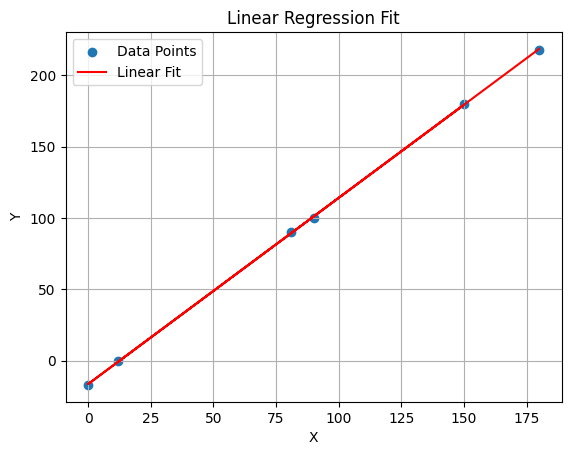

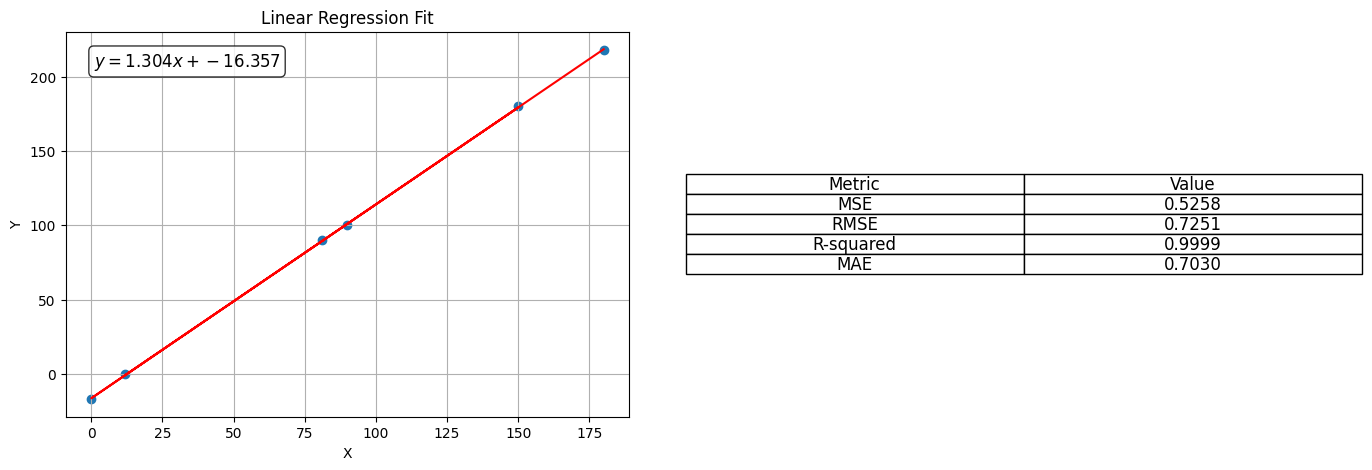

In [15]:
plot([-17,100,218,12,81,150])

In [18]:
def calculate_piecewise_linear_params(x_points, y_points=[0,90,180]):
    if len(x_points) != 3 or len(y_points) != 3:
        raise ValueError("Exactly three points are required.")
    
    # First segment (low x to mid x)
    slope1 = (y_points[1] - y_points[0]) / (x_points[1] - x_points[0])
    intercept1 = y_points[0] - slope1 * x_points[0]
    
    # Second segment (mid x to high x)
    slope2 = (y_points[2] - y_points[1]) / (x_points[2] - x_points[1])
    intercept2 = y_points[1] - slope2 * x_points[1]
    
    return (slope1, intercept1), (slope2, intercept2)

In [20]:
calculate_piecewise_linear_params([22,92,163])

((1.2857142857142858, -28.28571428571429),
 (1.267605633802817, -26.619718309859167))